# Introduction to Pandas

Pandas is by far the most commonly used primary Python tool for data analysis. It offers many tools for working with all kinds of data, and many packages are even built around the pandas tools. If you have worked with R before in another class, you are probably familiar with data frames. Pandas offers a DataFrame class of objects that has very similar properties to R data frames and will be the main method of storing tabular data (data with rows and columns).

If you'd like to read more about the libraries that we're loading here, <a href='https://pandas.pydata.org/docs/index.html'>take a look at the online documentation</a>




In [ ]:
import numpy as np 
import pandas as pd 

You can use the .head method for DataFrames to see the top few lines of the dataset. The rows represent individual observations, while the columns represent the variables. Note that there are row names as well as column names. The column names are the variable names, while the row names are by default just incrementing up from 0.# Reading in the Data Set
Before we can start analyzing data, we first need to actually bring in the data into Python so that we can work with it. We'll start by reading in a data set from a csv, or comma-separated value, file.

We use the read_csv function from pandas to read in the csv file.

In [ ]:
data_file = '201807-CAH_PulseOfTheNation_Raw.csv'
df = pd.read_csv(data_file)

You can use the .head method for DataFrames to see the top few lines of the dataset. The rows represent individual observations, while the columns represent the variables. Note that there are row names as well as column names. The column names are the variable names, while the row names are by default just incrementing up from 0.

In [ ]:
df.head()

<span style="color:red">Question 1: Bring in the Codebook file as a DataFrame object called `codebook`. This should have two columns: the name of the variable in the dataset as well as the description of that variable. Look at the first few lines.</span>

# Data from the internet

We can also bring in data from a URL. The Pulse of the Nation Data is available on their website and we can supply that URL directly to `read_csv()` in place of a file path. (you'll notice some slight differences in the formatting and colum names here, but these are otherwise identical)


In [ ]:

data_url = 'https://thepulseofthenation.com/downloads/201807-CAH_PulseOfTheNation_Raw.csv'
df_from_url = pd.read_csv(data_url)

In [ ]:
df_from_url.head()

# Exploring the Data Frame

There's a lot that you can do with Data Frames. The documentation for Data Frames (https://pandas.pydata.org/pandas-docs/stable/reference/frame.html) describes all of the methods and instance variables associated with it. We'll go over a few here that are helpful for exploring and looking at the data.

First, let's check the number of rows and columns. We can do this by looking at the shape attribute of a data frame.

In [ ]:
df.shape

In [ ]:
df.columns

The codebook DataFrame has information about what question each of these variables correspond to.

To get more information about the contents of the Data Frame, we can also use the `.info()` method. This will give us the number of non-null values and the type of data (these have all been read in as integers) for each column.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   gender                 800 non-null    object
 1   age                    800 non-null    int64 
 2   age_range              800 non-null    object
 3   political_party        800 non-null    object
 4   rep_change             220 non-null    object
 5   dem_change             244 non-null    object
 6   political_leaning      800 non-null    object
 7   education              800 non-null    object
 8   race                   800 non-null    object
 9   race_other             12 non-null     object
 10  trump                  800 non-null    object
 11  gov_air_water          800 non-null    object
 12  mandatory_election     800 non-null    object
 13  stereotypes            800 non-null    object
 14  respect_for_authority  800 non-null    object
 15  handout                

Notice that the count of non-null objects is 800 for most, but much smaller for others. This indicates that there are a few rows with missing values. We'll discuss how to deal with missing values later, but this is a good way to identify which variables have missing values and how many there are.

We have already used the head method, but we can also use the tail methods in order to look at the last few rows of the data frame.

In [153]:
df.tail()

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
795,Male,35,35-44,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,No
796,Male,61,55-64,Strong Democrat,NaN,DK/REF,Strong Liberal,High school or less,Asian,NaN,...,Yes,Strongly Agree,DK/REF,Not Very Well-informed,No,No,Yes,DK/REF,Yes,DK/REF
797,Male,70,65+,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,No
798,Female,85,65+,Independent,NaN,NaN,Moderate,High school or less,White,NaN,...,Yes,Strongly Agree,Somewhat Agree,Not Very Well-informed,DK/REF,Yes,Yes,Make no Difference,No,Yes
799,Female,51,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,Yes,Strongly Disagree,Somewhat Disagree,Well-informed,No,No,Yes,DK/REF,Yes,Yes


In [154]:
df.tail(10) # show additional rows

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
790,Male,69,65+,Not very Strong Republican,No,NaN,Strong Conservative,Some college,White,NaN,...,No,Strongly Agree,Somewhat Disagree,Well-informed,No,Yes,DK/REF,Help Republicans more,Yes,Yes
791,Male,37,35-44,Independent,NaN,NaN,Moderate,College degree,Asian,NaN,...,No,Somewhat Agree,Somewhat Agree,Not Very Well-informed,No,Yes,Yes,Make no Difference,No,Yes
792,Male,76,65+,DK/REF,NaN,NaN,Moderate,Some college,White,NaN,...,No,Somewhat Agree,Somewhat Disagree,Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
793,Male,48,45-54,Independent,NaN,NaN,Not Very Strong Conservative,Graduate degree,White,NaN,...,Yes,Strongly Agree,Somewhat Agree,Well-informed,No,No,DK/REF,Make no Difference,Yes,DK/REF
794,Male,72,65+,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Well-informed,Yes,No,No,Make no Difference,No,No
795,Male,35,35-44,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,No
796,Male,61,55-64,Strong Democrat,NaN,DK/REF,Strong Liberal,High school or less,Asian,NaN,...,Yes,Strongly Agree,DK/REF,Not Very Well-informed,No,No,Yes,DK/REF,Yes,DK/REF
797,Male,70,65+,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,No
798,Female,85,65+,Independent,NaN,NaN,Moderate,High school or less,White,NaN,...,Yes,Strongly Agree,Somewhat Agree,Not Very Well-informed,DK/REF,Yes,Yes,Make no Difference,No,Yes
799,Female,51,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,Yes,Strongly Disagree,Somewhat Disagree,Well-informed,No,No,Yes,DK/REF,Yes,Yes


In [155]:
df["gender"] 

0      Female
1      Female
2        Male
3        Male
4      Female
        ...  
795      Male
796      Male
797      Male
798    Female
799    Female
Name: gender, Length: 800, dtype: object

In [156]:
df.gender 

0      Female
1      Female
2        Male
3        Male
4      Female
        ...  
795      Male
796      Male
797      Male
798    Female
799    Female
Name: gender, Length: 800, dtype: object

# Accessing Rows
What if we want to get certain rows? We can use bracket notation to get the rows we want.

In [157]:
df[10:15] 

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
10,Male,56,55-64,DK/REF,NaN,NaN,Not Very Strong Liberal,High school or less,White,NaN,...,Yes,Somewhat Agree,Strongly Agree,Well-informed,DK/REF,No,Yes,Make no Difference,Yes,Yes
11,Male,69,65+,Strong Republican,No,NaN,Strong Conservative,High school or less,White,NaN,...,No,Strongly Agree,DK/REF,Well-informed,No,DK/REF,No,Help Republicans more,No,No
12,Male,55,55-64,DK/REF,NaN,NaN,DK/REF,Some college,Black,NaN,...,No,Strongly Agree,Somewhat Agree,Not Very Well-informed,No,Yes,Yes,Make no Difference,Yes,No
13,Male,22,18-24,Not Very strong Democrat,NaN,No,Moderate,Some college,White,NaN,...,Yes,Somewhat Agree,Strongly Agree,Well-informed,No,Yes,No,Make no Difference,Yes,No
14,Male,67,65+,Strong Democrat,NaN,No,Moderate,High school or less,White,NaN,...,No,Strongly Agree,Strongly Agree,Well-informed,Yes,Yes,No,Help Democrats more,Yes,Yes


We can also use `loc` with square brackets. We use a colon to indicate that we want a series of indices with a start and end. We can also leave one side of the colon empty to indicate that we want the rest of the values on that end.

In [158]:
df.loc[10:20] # rows labeled 10 - 20

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
10,Male,56,55-64,DK/REF,NaN,NaN,Not Very Strong Liberal,High school or less,White,NaN,...,Yes,Somewhat Agree,Strongly Agree,Well-informed,DK/REF,No,Yes,Make no Difference,Yes,Yes
11,Male,69,65+,Strong Republican,No,NaN,Strong Conservative,High school or less,White,NaN,...,No,Strongly Agree,DK/REF,Well-informed,No,DK/REF,No,Help Republicans more,No,No
12,Male,55,55-64,DK/REF,NaN,NaN,DK/REF,Some college,Black,NaN,...,No,Strongly Agree,Somewhat Agree,Not Very Well-informed,No,Yes,Yes,Make no Difference,Yes,No
13,Male,22,18-24,Not Very strong Democrat,NaN,No,Moderate,Some college,White,NaN,...,Yes,Somewhat Agree,Strongly Agree,Well-informed,No,Yes,No,Make no Difference,Yes,No
14,Male,67,65+,Strong Democrat,NaN,No,Moderate,High school or less,White,NaN,...,No,Strongly Agree,Strongly Agree,Well-informed,Yes,Yes,No,Help Democrats more,Yes,Yes
15,Female,39,35-44,Independent,NaN,NaN,Strong Liberal,College degree,White,NaN,...,Yes,Somewhat Agree,Strongly Disagree,Well-informed,No,Yes,No,Help Democrats more,Yes,No
16,Male,74,65+,Not Very strong Democrat,NaN,DK/REF,Moderate,Graduate degree,White,NaN,...,Yes,Strongly Agree,Somewhat Disagree,Well-informed,No,No,No,Help Democrats more,Yes,No
17,Female,69,65+,Strong Democrat,NaN,No,Moderate,Some college,White,NaN,...,Yes,Somewhat Disagree,DK/REF,Well-informed,No,Yes,Yes,Help Democrats more,No,Yes
18,Male,47,45-54,Strong Republican,Yes,NaN,Strong Conservative,College degree,White,NaN,...,Yes,Strongly Agree,Somewhat Disagree,Not Very Well-informed,No,Yes,No,Make no Difference,Yes,No
19,Female,69,65+,Not very Strong Republican,Yes,NaN,Moderate,Some college,White,NaN,...,No,Somewhat Agree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes


In [159]:
df.loc[:10]  # rows from the first to the label 10

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
1,Female,34,25-34,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Strongly Disagree,Strongly Disagree,Well-informed,No,No,Yes,Help Democrats more,No,DK/REF
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes
5,Female,62,55-64,Strong Republican,Yes,NaN,Not Very Strong Conservative,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,No,Make no Difference,Yes,No
6,Female,83,65+,Independent,NaN,NaN,Moderate,High school or less,White,NaN,...,No,Strongly Agree,Strongly Agree,Not Very Well-informed,No,No,Yes,Make no Difference,Yes,No
7,Male,25,25-34,Independent,NaN,NaN,Strong Conservative,Some college,Black,NaN,...,Yes,Somewhat Agree,Strongly Agree,Well-informed,No,No,Yes,DK/REF,Yes,DK/REF
8,Male,46,45-54,Strong Republican,No,NaN,Strong Conservative,College degree,White,NaN,...,No,Strongly Agree,Strongly Agree,Well-informed,Yes,Yes,No,Make no Difference,Yes,No
9,Female,44,35-44,Not Very strong Democrat,NaN,No,Not Very Strong Liberal,College degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Not Very Well-informed,No,DK/REF,Yes,Help Democrats more,DK/REF,DK/REF


In [160]:
df.loc[:] # all rows

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
1,Female,34,25-34,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Strongly Disagree,Strongly Disagree,Well-informed,No,No,Yes,Help Democrats more,No,DK/REF
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,Male,35,35-44,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,No
796,Male,61,55-64,Strong Democrat,NaN,DK/REF,Strong Liberal,High school or less,Asian,NaN,...,Yes,Strongly Agree,DK/REF,Not Very Well-informed,No,No,Yes,DK/REF,Yes,DK/REF
797,Male,70,65+,Strong Democrat,NaN,No,Strong Liberal,Graduate degree,White,NaN,...,Yes,Somewhat Agree,Somewhat Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,No
798,Female,85,65+,Independent,NaN,NaN,Moderate,High school or less,White,NaN,...,Yes,Strongly Agree,Somewhat Agree,Not Very Well-informed,DK/REF,Yes,Yes,Make no Difference,No,Yes


In addition, we can use loc to access certain columns as well as certain indices in the Data Frame.

In [161]:
df.loc[10:20,"race"] 

10     White
11     White
12     Black
13     White
14     White
15     White
16     White
17     White
18     White
19     White
20    Latino
Name: race, dtype: object

And we can use similar notation to get a range of columns. This would give us the all columns from "gender" through "race" (inclusive)

In [162]:
df.loc[10:20,'gender':'race']

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race
10,Male,56,55-64,DK/REF,NaN,NaN,Not Very Strong Liberal,High school or less,White
11,Male,69,65+,Strong Republican,No,NaN,Strong Conservative,High school or less,White
12,Male,55,55-64,DK/REF,NaN,NaN,DK/REF,Some college,Black
13,Male,22,18-24,Not Very strong Democrat,NaN,No,Moderate,Some college,White
14,Male,67,65+,Strong Democrat,NaN,No,Moderate,High school or less,White
15,Female,39,35-44,Independent,NaN,NaN,Strong Liberal,College degree,White
16,Male,74,65+,Not Very strong Democrat,NaN,DK/REF,Moderate,Graduate degree,White
17,Female,69,65+,Strong Democrat,NaN,No,Moderate,Some college,White
18,Male,47,45-54,Strong Republican,Yes,NaN,Strong Conservative,College degree,White
19,Female,69,65+,Not very Strong Republican,Yes,NaN,Moderate,Some college,White


In this case, we were able to use the `"-5:"` to indicate that we want the last 5 rows of the data frame. Note that we can't do the same with `.loc.` This is because `.loc` retrieves the rows from a particular label in the Data Frame, while `.iloc` retrieves them from particular positions.

# Data summaries

When we look individual columns, that itself is a Series object rather than a DataFrame object.

In [163]:
type(df.gender)

pandas.core.series.Series

In [164]:
df.age.max()

99

In [165]:
df.age.median()

63.0

<font style="color:red">**Question 2: What is the mean age of people in this dataset? What is the standard deviation of age**</font>

You can also use the `describe` method with DataFrames to calculate a lot of the summary statistics for numerical variables. In this dataset, we only have one, so we will only have one column.

In [166]:
df.describe()

,age
count,800.000000
mean,60.563750
std,17.222782
min,18.000000
25%,50.000000
50%,63.000000
75%,74.000000
max,99.000000


For categorical variables, you can use the `value_counts` method to create a frequency table

In [167]:
df.race.value_counts()

race
White             602
Black              98
Latino             43
DK/REF             31
Asian              14
Other: SPECIFY     12
Name: count, dtype: int64

To get the counts as proportions instead, use the `normalize=True` argument.

In [168]:
df.race.value_counts(normalize=True)

race
White             0.75250
Black             0.12250
Latino            0.05375
DK/REF            0.03875
Asian             0.01750
Other: SPECIFY    0.01500
Name: proportion, dtype: float64

And we can use the `value_counts` method on a data frame with multiple columns to count unique combinations of multiple variables.

In [169]:
df[['gender', 'political_party']].value_counts()

gender  political_party           
Female  Strong Democrat               135
        Independent                   129
Male    Independent                   118
        Strong Republican              93
Female  Strong Republican              89
Male    Strong Democrat                63
Female  DK/REF                         39
Male    DK/REF                         34
Female  Not Very strong Democrat       22
Male    Not Very strong Democrat       21
Female  Not very Strong Republican     20
Male    Not very Strong Republican     17
Other   Independent                     5
DK/REF  DK/REF                          4
        Independent                     4
Other   DK/REF                          3
DK/REF  Strong Democrat                 2
        Not Very strong Democrat        1
Other   Strong Republican               1
Name: count, dtype: int64

<font style="color:red">**Question 3: What is the distribution of political party like? Which political party was the most common answer? What proportion of people said they didn't know or refused to answer?**</font>

# Subsetting

You can subset DataFrames using logical operators like `>`, `<`, `==` etc. For instance, if I wanted to get a list of all rows where `age` was over 40, I could write



In [170]:
older_than_40 = df[df.age>40]
older_than_40.head()

,gender,age,age_range,political_party,rep_change,dem_change,political_leaning,education,race,race_other,...,stereotypes,respect_for_authority,handout,climate_change,epa,biz_regulations,nuclear_emissions,voter_turnout_help,american_heartland,south_racist
0,Female,55,55-64,Independent,NaN,NaN,Moderate,Some college,White,NaN,...,Yes,Strongly Agree,Strongly Disagree,Well-informed,No,Yes,Yes,Help Democrats more,Yes,Yes
2,Male,49,45-54,DK/REF,NaN,NaN,Moderate,College degree,White,NaN,...,DK/REF,Strongly Agree,Somewhat Agree,Well-informed,No,No,Yes,DK/REF,Yes,No
3,Male,41,35-44,Independent,NaN,NaN,Strong Conservative,High school or less,White,NaN,...,Yes,Strongly Agree,Strongly Agree,Not Very Well-informed,Yes,Yes,DK/REF,Make no Difference,Yes,No
4,Female,65,65+,Independent,NaN,NaN,Moderate,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,Yes,Help Democrats more,Yes,Yes
5,Female,62,55-64,Strong Republican,Yes,NaN,Not Very Strong Conservative,Graduate degree,White,NaN,...,Yes,Somewhat Disagree,Somewhat Disagree,Well-informed,No,No,No,Make no Difference,Yes,No


And I can combine this behavior with the `value_counts` method to look at frequency tables for a particular subset of the data and compare them to each other.

In [171]:
 df[df.age>40]['political_party'].value_counts(normalize = True)

political_party
Independent                   0.292217
Strong Democrat               0.262849
Strong Republican             0.246696
DK/REF                        0.104258
Not Very strong Democrat      0.046990
Not very Strong Republican    0.046990
Name: proportion, dtype: float64

In [172]:
 df[df.age<=40]['political_party'].value_counts(normalize = True)

political_party
Independent                   0.478992
Strong Democrat               0.176471
Strong Republican             0.126050
Not Very strong Democrat      0.100840
DK/REF                        0.075630
Not very Strong Republican    0.042017
Name: proportion, dtype: float64

<font style="color:red">**Question 4:What is the average age of people who have a college degree or a graduate degree? What is the distribution of political party like for those people?**</font>

# Comparison between Variables

To do comparison between two categorical variables, we can use the `crosstab` function from pandas. This allows us to look at the breakdown of the number of people within the combinations of categories of multiple variables.



In [173]:
pd.crosstab(df.political_party, df.gender)

gender,DK/REF,Female,Male,Other
political_party,,,,
DK/REF,4,39,34,3
Independent,4,129,118,5
Not Very strong Democrat,1,22,21,0
Not very Strong Republican,0,20,17,0
Strong Democrat,2,135,63,0
Strong Republican,0,89,93,1


To find the row proportion, we can use `normalize = 'index'`. Using `normalize='columns'` gives you the column proportions.

In [174]:
pd.crosstab(df.political_party, df.gender, normalize='columns') # column proportions

gender,DK/REF,Female,Male,Other
political_party,,,,
DK/REF,0.363636,0.089862,0.098266,0.333333
Independent,0.363636,0.297235,0.341040,0.555556
Not Very strong Democrat,0.090909,0.050691,0.060694,0.000000
Not very Strong Republican,0.000000,0.046083,0.049133,0.000000
Strong Democrat,0.181818,0.311060,0.182081,0.000000
Strong Republican,0.000000,0.205069,0.268786,0.111111


In [175]:
pd.crosstab(df.political_party, df.gender, normalize = 'index') # row proportions

gender,DK/REF,Female,Male,Other
political_party,,,,
DK/REF,0.050000,0.487500,0.425000,0.037500
Independent,0.015625,0.503906,0.460938,0.019531
Not Very strong Democrat,0.022727,0.500000,0.477273,0.000000
Not very Strong Republican,0.000000,0.540541,0.459459,0.000000
Strong Democrat,0.010000,0.675000,0.315000,0.000000
Strong Republican,0.000000,0.486339,0.508197,0.005464


<div class="alert alert-block alert-info">
<b>Tip:</b> When creating a crosstab, keep in mind that you can get very different results depending on the kind of proportions you analyze. Getting "row proportions" means you're calculating <b>"the proportion of people in [row category] who have [column characteristic]</b>, and getting "column proportions" means the reverse.

<font style="color:red">**Question 5: Create a crosstab that shows the the breakdown of party identification across different "races". Is racial identity associated with party ID?**</font>

If we want to look at the association between a numerical variable and a categorical variable, we can use the `pivot_table` method to calculate the value of some statistic of the numerical variable for each category of the categorical variable.

In [176]:
df.pivot_table(values = 'age',index ='political_party')

,age
political_party,
DK/REF,63.612500
Independent,57.410156
Not Very strong Democrat,53.363636
Not very Strong Republican,57.135135
Strong Democrat,63.065000
Strong Republican,63.333333


By default, we will return the arithmetic mean, but we can supply the name (in quotation marks) of some other function to the `aggfunc` argument. 

For instance, to get the standard deviation of `age` for each party ID group, we would use `aggfunc='std'`

In [177]:
df.pivot_table(values = 'age',index ='political_party', aggfunc = 'std')

,age
political_party,
DK/REF,17.904454
Independent,18.027640
Not Very strong Democrat,20.640997
Not very Strong Republican,16.384549
Strong Democrat,15.928886
Strong Republican,15.130688


Alternatively, we can supply the name of a custom function we write ourselves, or a `lambda` function defined inline. 

In [178]:
# calculate the mean absolute deviation
def mean_abs_dev(x):
    x = np.array(x)
    mad = sum(abs(x - x.mean() )) / len(x)
    return mad

df.pivot_table(values = 'age',index ='political_party', aggfunc = mean_abs_dev)

# one-line equivalent with a lambda function: 
# df.pivot_table(values = 'age',index ='political_party', aggfunc = lambda x: sum(abs(np.mean(x)-x)/len(x)))

,age
political_party,
DK/REF,14.410938
Independent,15.007721
Not Very strong Democrat,17.243802
Not very Strong Republican,13.497443
Strong Democrat,12.571100
Strong Republican,11.996357


Finally, we can supply multiple functions in a list to get more than one aggregate in a table:

In [179]:
df.pivot_table(values = 'age',index ='political_party', aggfunc = ["mean", mean_abs_dev, "std"])

,mean,mean_abs_dev,std
,age,age,age
political_party,,,
DK/REF,63.612500,14.410938,17.904454
Independent,57.410156,15.007721,18.027640
Not Very strong Democrat,53.363636,17.243802,20.640997
Not very Strong Republican,57.135135,13.497443,16.384549
Strong Democrat,63.065000,12.571100,15.928886
Strong Republican,63.333333,11.996357,15.130688


<font style="color:red">**Question 6: What is the median age of respondents by their response to whether they supported Trump or not? Does there seem to be an association?**</font>

# Simple Visualizations

We can use the <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html">`plot`</a> methods for DataFrames with these summaries to create simple visualizations. We'll discuss how to make nicer, more customizable graphs later, but for now, these should be very helpful in seeing relationships and exploring the data.

For a bar chart, you can use `plot.bar`.


<Axes: xlabel='race'>

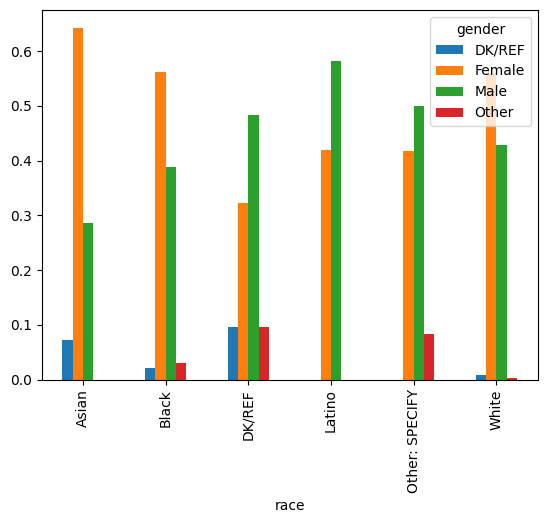

In [180]:
race_by_gender = pd.crosstab(df.race, df.gender, normalize = 'index')
race_by_gender.plot.bar()

<font style="color:red">**Question 7: Create a bar graph of education and political party. Does it look like there is a relationship based on the graph?**</font>